<a href="https://colab.research.google.com/github/aroonaram/Computer-Vision/blob/main/Assignment_3Atmaram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Vision API to detect and extract text from images

## Prerequisite

Steps to follow to set up pre-requisites in GCP :
1. Enable Cloud Vision API 
2. Create an API key in the GCP console
3. Create a Public bucket to store the images
4. Upload images to the GCP bucket. 

In [ ]:
# import libraries
import getpass
from googleapiclient.discovery import build
import os
from google.colab import drive
import base64

In [ ]:
APIKEY = getpass.getpass()

··········


### Image Link

In [ ]:
IMAGE1="gs://assignment3_atmaram/1.jpeg" # link to the GCP bucket

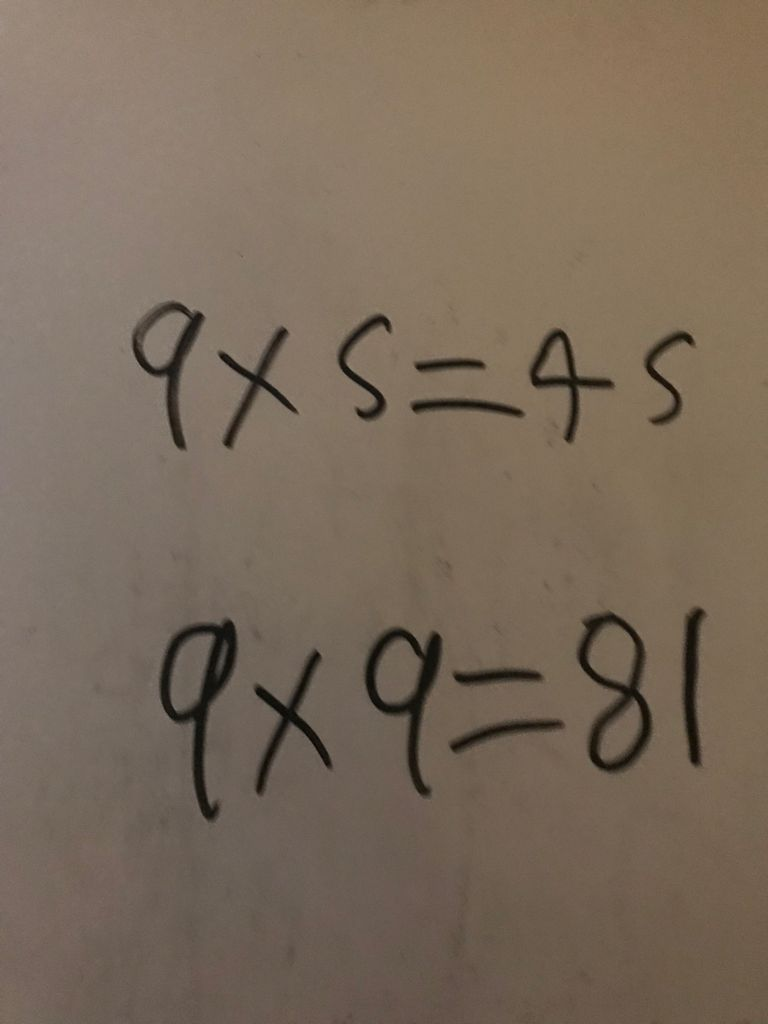

In [ ]:
IMAGE2="gs://assignment3_atmaram/2.JPG" # link to the GCP bucket

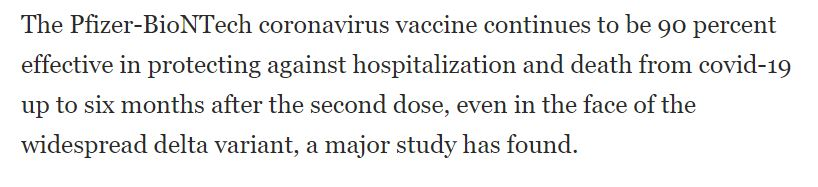

## Vision API

##Define API

In [ ]:
vservice = build('vision', 'v1', developerKey=APIKEY)

### Request to API - Image 1

In [ ]:
request = vservice.images().annotate(body={
        'requests': [{
                'image': {
                    'source': {
                        'gcs_image_uri': IMAGE1
                    }
                },
                'features': [{
                    'type': 'TEXT_DETECTION',
                    'maxResults': 3,
                }]
            }],
        })

###Response from API - Image 1


In [ ]:
responses = request.execute(num_retries=3)
print(responses['responses'][0]['textAnnotations'][0]['description'])

9メ5=45
9メ9=81



This block of code processes the response, validates the response and prints the results.

In [ ]:
elements = ([int(x['description']) for x in responses['responses'][0]['textAnnotations'] if (len(x)< 3 and x['description'].isnumeric() )])
i = 0
while i < len(elements):
  if(elements[i]*elements[(i+1)]) == elements[i+2]:
    print(elements[i], "x",elements[(i+1)],"=",elements[(i+2)], "- correct")
  else:
    print(elements[i], "x",elements[(i+1)],"=",elements[(i+2)], "- incorrect")
  i+=3

9 x 5 = 45 - correct
9 x 9 = 81 - correct


### Request to API - Image 2

In [ ]:
request1 = vservice.images().annotate(body={
        'requests': [{
                'image': {
                    'source': {
                        'gcs_image_uri': IMAGE2
                    }
                },
                'features': [{
                    'type': 'TEXT_DETECTION',
                    'maxResults': 3,
                }]
            }],
        })

### Response to API - Image 2

In [ ]:
responses1 = request1.execute(num_retries=3)
print(responses1['responses'][0]['textAnnotations'][0]['description'])

The Pfizer-BioNTech coronavirus vaccine continues to be 90 percent
effective in protecting against hospitalization and death from covid-19
up to six months after the second dose, even in the face of the
widespread delta variant, a major study has found.

